# Who Earns More? A Data Story from the Adult Income Dataset

**Audience:** Non-technical / executive audience  
**Goal:** Use data from the Adult Income dataset to tell a clear, visual story about how factors like **education, age, gender, and work hours** relate to the likelihood of earning **more than $50K per year**.

---

## 1. Introduction

This notebook explores the Adult Income dataset, which contains information about individuals such as:

- Age  
- Education level  
- Occupation  
- Hours worked per week  
- Marital status  
- Gender  
- Income level (<=50K or >50K)

We will focus on a few guiding questions:

1. **How is income distributed in this dataset?** (What share earns >50K?)
2. **How does education level relate to higher income?**
3. **Are there differences in income between genders?**
4. **How do age and hours worked per week relate to higher income?**

At the end, we will summarize the key insights and what they might mean for a decision-maker.


In [2]:
# Basic imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a bit nicer
plt.style.use("ggplot")
sns.set(font_scale=1.1)

# Display dataframes more fully
pd.set_option("display.max_columns", None)


In [3]:
# Load data
df = pd.read_csv("adult.csv")

df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Optional: strip whitespace from column names
df.columns = df.columns.str.strip()

# Optional: strip whitespace in object columns (like 'income', 'education', 'gender')
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()


## 2. Questions We Will Explore

To tell a focused story, we will answer:

1. **Income Distribution:**  
   - What percentage of people earn `>50K` versus `<=50K`?

2. **Education & Income:**  
   - How does education level relate to higher income?

3. **Gender & Income:**  
   - Are there visible differences between men and women in terms of earning `>50K`?

4. **Age & Hours Worked:**  
   - How do age and hours worked per week differ between higher and lower income groups?

Throughout, we’ll focus on **clear visuals** and **plain-language insights** for a non-technical audience.


In [6]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Income Distribution

We start by understanding the **overall balance** of the dataset:
- How many people earn `>50K`?
- How many earn `<=50K`?

This gives context for all other comparisons.


income_counts = df["income"].value_counts().sort_index()
income_counts


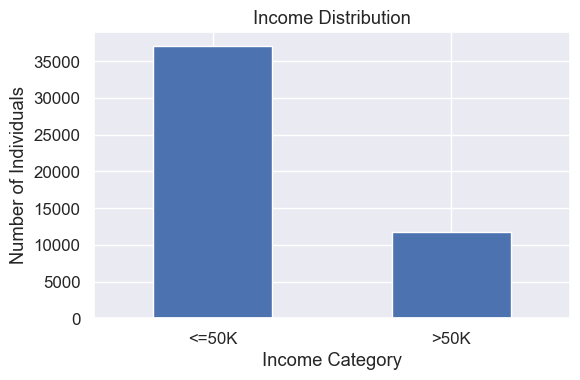

income
<=50K    76.071823
>50K     23.928177
Name: count, dtype: float64

In [11]:
plt.figure(figsize=(6, 4))
income_counts.plot(kind="bar")

plt.title("Income Distribution")
plt.xlabel("Income Category")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Also compute percentages
income_percent = income_counts / income_counts.sum() * 100
income_percent


### Insight

- The majority of individuals in this dataset earn **<=50K** per year.
- Only a smaller share (around X%) earn **>50K**.

This imbalance is important to keep in mind as we compare groups.


## 4. Education and Income

Next, we look at **education level**.  
Key questions:

- Are people with higher education more likely to earn `>50K`?
- Which education levels stand out?


In [14]:
# Group by education and income, then compute counts
edu_income = (
    df.groupby(["education", "income"])
      .size()
      .reset_index(name="count")
)

edu_income.head()


,education,income,count
0,10th,<=50K,1302
1,10th,>50K,87
2,11th,<=50K,1720
3,11th,>50K,92
4,12th,<=50K,609


In [15]:
# Total per education level
edu_totals = edu_income.groupby("education")["count"].transform("sum")
edu_income["percent"] = edu_income["count"] / edu_totals * 100

edu_income.head()


,education,income,count,percent
0,10th,<=50K,1302,93.736501
1,10th,>50K,87,6.263499
2,11th,<=50K,1720,94.922737
3,11th,>50K,92,5.077263
4,12th,<=50K,609,92.694064


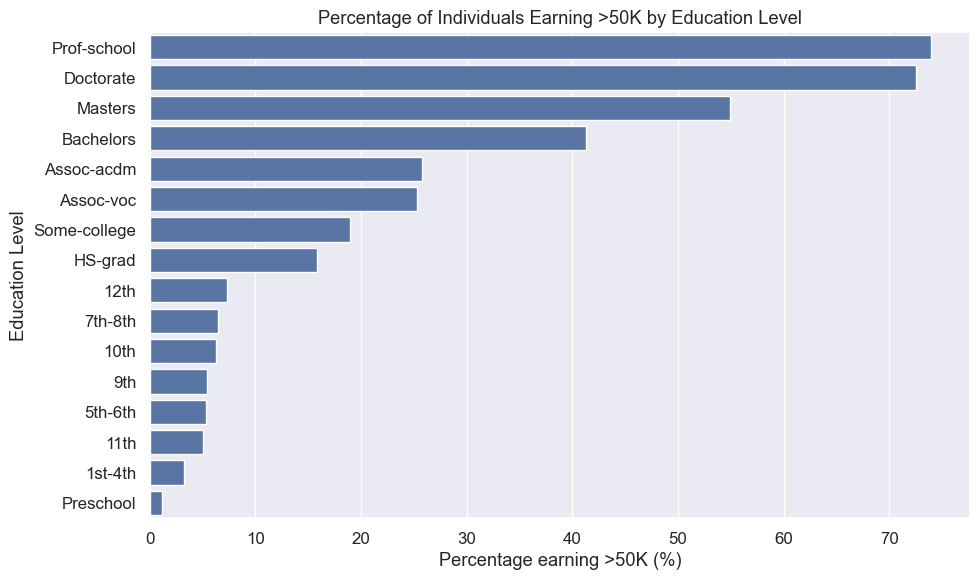

In [16]:
# Filter to >50K rows only
edu_high_income = edu_income[edu_income["income"] == ">50K"].copy()

# Sort by percentage
edu_high_income = edu_high_income.sort_values("percent", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=edu_high_income,
    x="percent",
    y="education"
)
plt.title("Percentage of Individuals Earning >50K by Education Level")
plt.xlabel("Percentage earning >50K (%)")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


### Insight

- Higher education levels (such as **Bachelors, Masters, Doctorate** if present) show a **much higher percentage** of individuals earning `>50K`.
- Lower education levels tend to have **fewer high earners**.

**Story point:** Education appears to be a strong factor associated with higher income in this dataset.


## 5. Gender and Income

Now we look at income by **gender**:

- Are men more likely than women to earn `>50K`?
- How large is the gap?


In [17]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [19]:
gender_income = (
    df.groupby(["gender", "income"])
      .size()
      .reset_index(name="count")
)

# Compute percent within gender
gender_totals = gender_income.groupby("gender")["count"].transform("sum")
gender_income["percent"] = gender_income["count"] / gender_totals * 100

gender_income


,gender,income,count,percent
0,Female,<=50K,14423,89.074852
1,Female,>50K,1769,10.925148
2,Male,<=50K,22732,69.623277
3,Male,>50K,9918,30.376723


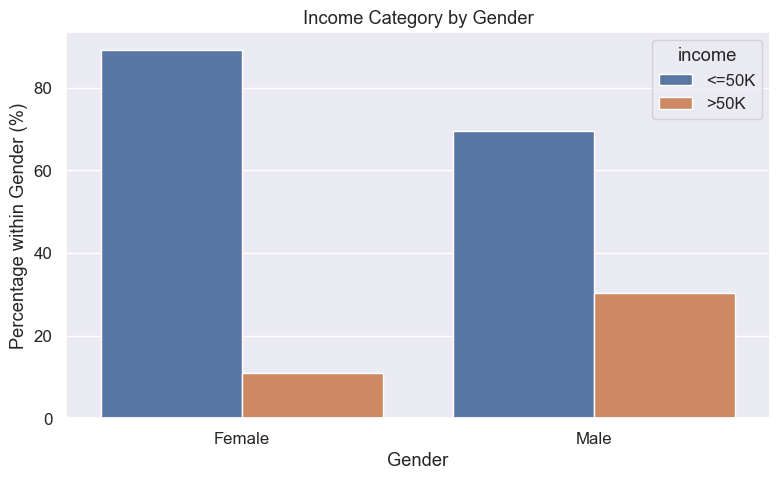

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=gender_income,
    x="gender",
    y="percent",
    hue="income"
)
plt.title("Income Category by Gender")
plt.ylabel("Percentage within Gender (%)")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


### Insight

- In this dataset, **men are more likely than women to appear in the >50K group**.
- Women are more represented in the `<=50K` category.

**Story point:** There is a **visible income gap by gender** in this dataset, even without controlling for other factors.


## 6. Age, Work Hours, and Income

We now explore:

- Do people earning `>50K` tend to be **older or younger** than those earning `<=50K`?
- Do they work **more hours per week** on average?


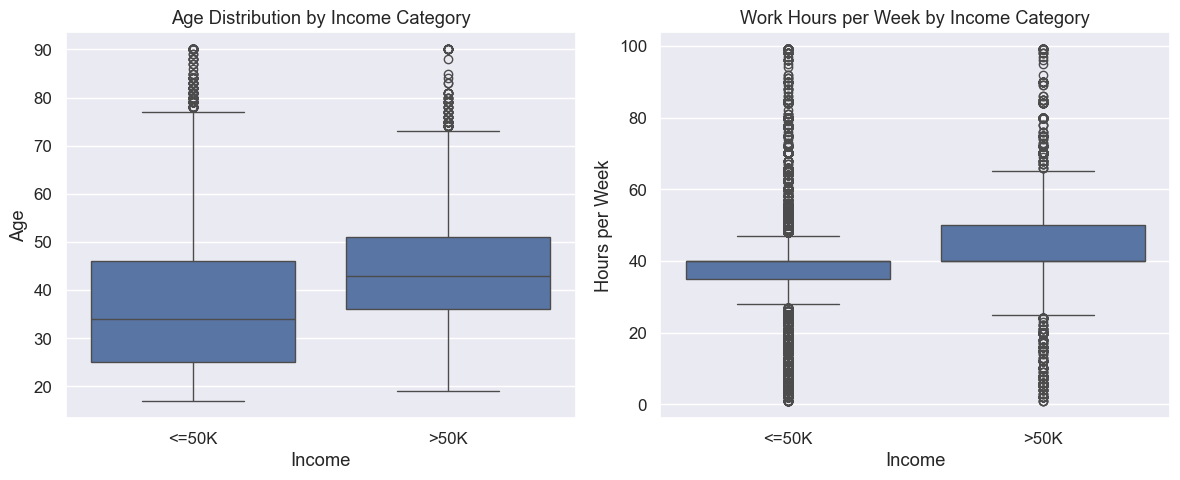

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="income", y="age")
plt.title("Age Distribution by Income Category")
plt.xlabel("Income")
plt.ylabel("Age")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="income", y="hours-per-week")
plt.title("Work Hours per Week by Income Category")
plt.xlabel("Income")
plt.ylabel("Hours per Week")

plt.tight_layout()
plt.show()


In [26]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [33]:
df.groupby("income")[["age", "hours-per-week"]].mean().round(1)


,age,hours-per-week
income,,
<=50K,36.9,38.8
>50K,44.3,45.5


### Insight

- Individuals in the `>50K` group tend to be **older on average** compared to those in the `<=50K` group.
- They also tend to work **more hours per week on average**.

**Story point:** Higher income in this dataset is associated with both **greater work experience (age)** and **higher work commitment (hours/week)**.


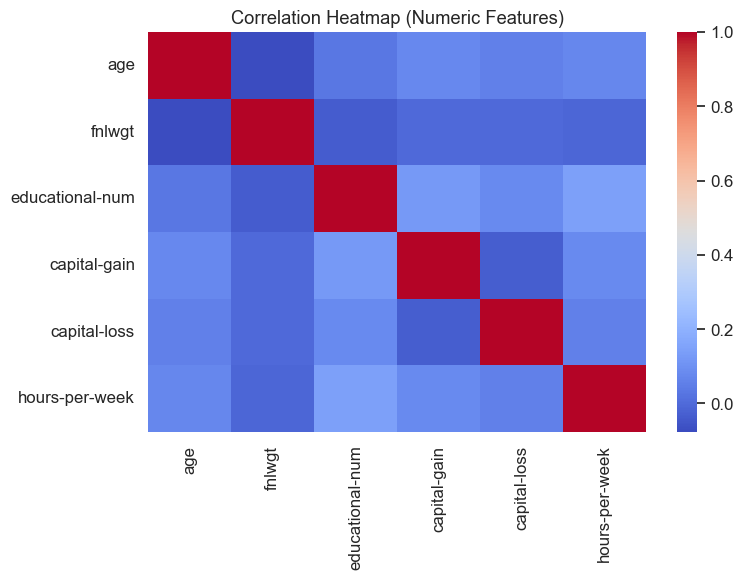

In [34]:
numeric_cols = df.select_dtypes(include=[np.number])

corr = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()
